In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import mglearn 
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')

In [3]:
# Exploratory data analysis
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002281,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [5]:
# Let us first deal with missing element of each column and then we will move forward
print(df.Loan_ID.isnull().sum())
# Since we see that there are not empty elements in loan_id and it is a column which is somewhat not required for the analysis we save it in separate list and drop it from the main dataframe
loan_id=df.Loan_ID
df.drop(['Loan_ID'],axis=1,inplace=True)
df.head()

0


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Gender
print(df['Gender'].isnull().sum())
# Since we don't know the gender and there is no way to fill this we need to drop these 
df = df[df['Gender'].notna()]

13


In [7]:
# Married
print(df['Married'].isnull().sum())
df=df[df['Married'].notna()]
print(df['Married'].isnull().sum())

3
0


In [8]:
# Dependents
print('No of missing values of dependents: ',df.Dependents.isnull().sum()) # No of Null Values
print('Independent value counts:\n{}'.format(df.Dependents.value_counts()))
# Filling zeros for the missing values we have
df.Dependents.fillna(value='0',inplace=True)
print('No of missing values of dependents: ',df.Dependents.isnull().sum()) # No of Null Values

No of missing values of dependents:  12
Independent value counts:
0     338
1     101
2      99
3+     48
Name: Dependents, dtype: int64
No of missing values of dependents:  0


In [9]:
print('Independent value counts:\n{}'.format(df.Dependents.value_counts()))


Independent value counts:
0     350
1     101
2      99
3+     48
Name: Dependents, dtype: int64


In [10]:
# Education
print('No of missing values of Education: ',df.Education.isnull().sum()) # No of Null Values
print('Independent value counts:\n{}'.format(df.Education.value_counts()))
# No missing value so we are good here

No of missing values of Education:  0
Independent value counts:
Graduate        465
Not Graduate    133
Name: Education, dtype: int64


In [11]:
# Self Employed
print('No of missing values of Self_Employed: ',df.Self_Employed.isnull().sum()) # No of Null Values
print('Independent value counts:\n{}'.format(df.Self_Employed.value_counts()))
df.Self_Employed.fillna(value='No',inplace=True)
print('No of missing values of Self_Employed: ',df.Self_Employed.isnull().sum()) # No of Null Values

No of missing values of Self_Employed:  32
Independent value counts:
No     488
Yes     78
Name: Self_Employed, dtype: int64
No of missing values of Self_Employed:  0


In [12]:
# ApplicantIncome
print('No of missing values of Applicant Income: ',df.ApplicantIncome.isnull().sum()) # No of Null values


No of missing values of Applicant Income:  0


In [13]:
# CoApplicant Income
print('No of missing values of CoApplicant Income: ',df.CoapplicantIncome.isnull().sum()) # No of Null values


No of missing values of CoApplicant Income:  0


In [14]:
# LoanAmount 
print('No of missing values of Loan Amount: ',df.LoanAmount.isnull().sum()) # No of Null values
df=df[df.LoanAmount.notna()]
print('No of missing values of Loan Amount: ',df.LoanAmount.isnull().sum()) # No of Null values
print(df.LoanAmount.dtype)

No of missing values of Loan Amount:  21
No of missing values of Loan Amount:  0
float64


In [15]:
# Loan Amount Term
print('No of missing values of Loan Amount Term: ',df.Loan_Amount_Term.isnull().sum()) # No of Null values
print('Independent value counts:\n{}'.format(df.Loan_Amount_Term.value_counts()))
# Since most people pply for loan for the longest time i.e for 360. we assume that people missing this would be applying it to all
df.Loan_Amount_Term.fillna(value=360.0,inplace=True)


No of missing values of Loan Amount Term:  14
Independent value counts:
360.0    481
180.0     41
480.0     14
300.0     12
84.0       4
240.0      3
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [16]:
print('Independent value counts:\n{}'.format(df.Loan_Amount_Term.value_counts()))

Independent value counts:
360.0    495
180.0     41
480.0     14
300.0     12
84.0       4
240.0      3
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [17]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [18]:
# Credit History
print('No of missing values of Credit History: ',df.Credit_History.isnull().sum()) # No of Null values
print('Unique Values Count:\n{} '.format(df.Credit_History.value_counts()))
# Assuming that people with credit history will get a loan and those who did not have will have there data missing 
df.Credit_History.fillna(value=0.0,inplace=True)

No of missing values of Credit History:  48
Unique Values Count:
1.0    447
0.0     82
Name: Credit_History, dtype: int64 


In [19]:
# Property Area
print('No of missing values of Property area: ',df.Property_Area.isnull().sum()) # No of Null values
print('Unique Values Count:\n{} '.format(df.Property_Area.value_counts()))

No of missing values of Property area:  0
Unique Values Count:
Semiurban    221
Urban        187
Rural        169
Name: Property_Area, dtype: int64 


In [20]:
# Now we have dealt with missing points we need to take care of the data types
# Again starting with the first column
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [21]:
print(df.dtypes)

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [22]:
df['Income']=df.ApplicantIncome+df.CoapplicantIncome
df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [23]:
print(df.Property_Area.value_counts())

Semiurban    221
Urban        187
Rural        169
Name: Property_Area, dtype: int64


In [24]:
# Gender
gender={'Male':1,'Female':0}
df.Gender=[gender[item] for item in df.Gender]
# Married
married={'Yes':1,'No':0}
df.Married=[married[item] for item in df.Married]
# Education
education={'Graduate':1,'Not Graduate':0}
df.Education=[education[item] for item in df.Education]
# Self_Employed
self_employed={'Yes':1,'No':0}
df.Self_Employed=[self_employed[item] for item in df.Self_Employed]


In [25]:
# Loan Status
loan={'N':0,'Y':1}
df.Loan_Status=[loan[item] for item in df.Loan_Status]
y=df.Loan_Status
df.drop(['Loan_Status'],inplace=True,axis=1)

In [26]:
df_dummies=pd.get_dummies(df)
X=df_dummies.iloc[:,:].values
print(X.shape)

(577, 15)


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
# Using the Simple Logistic regrssion 
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print("Test Score:{:.3f}".format(logreg.score(X_test,y_test)))

Test Score:0.750


In [33]:
# Using MinMaxScaler and SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
'svc__gamma':[0.001, 0.01, 0.1, 1, 10, 100]}

pipe=make_pipeline(StandardScaler(),PolynomialFeatures(),SVC())
grid=GridSearchCV(pipe,param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)
print('Best Parameters:{}'.format(grid.best_params_))
print('Best Score:{:.3f}'.format(grid.best_score_))
print('Test Score: {:.3f}'.format(grid.score(X_test,y_test)))

Best Parameters:{'polynomialfeatures__degree': 1, 'svc__C': 10, 'svc__gamma': 0.001}
Best Score:0.777
Test Score: 0.750


In [34]:
from sklearn.metrics import confusion_matrix
y_pred=grid.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

[[15 20]
 [ 9 72]]


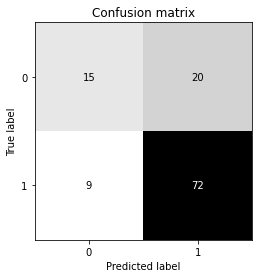

In [37]:
import mglearn
scores_image = mglearn.tools.heatmap(
confusion_matrix(y_test, y_pred), xlabel='Predicted label',
ylabel='True label', xticklabels=[0,1],
yticklabels=[0,1], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()